## Black Friday Sale 
##### A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

##### Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.
##### We have created two Train and Test datasets for models for further work.

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.pandas.set_option("max_columns",None)
pd.pandas.set_option("max_rows",None)

In [37]:
# reading train set
data_train = pd.read_csv("C:/Users/HP/Downloads/black_friday/black_friday/blackFriday_train.csv")
data_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [38]:
data_train.shape

(550068, 12)

In [39]:
# reading test set
data_test = pd.read_csv("C:/Users/HP/Downloads/black_friday/black_friday/blackFriday_test.csv")
data_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [40]:
data_test.shape

(233599, 11)

In [41]:
data = data_train.append(data_test)
data.shape

(783667, 12)

In [42]:
# dropping User_ID as it seems to be useless column
data.drop("User_ID",axis = 1,inplace =True)
data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [43]:
# keeping all categorical features in one list
categorical_features = [feature for feature in data.columns if data[feature].dtypes == "O"]
categorical_features

['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']

### converting categorical values into numerical values

In [44]:
# Considering the "Gender","Age","Stay_In_Current_City_Years" columns as "Product_ID" is unique 
# Gender
data["Gender"].unique()

array(['F', 'M'], dtype=object)

In [45]:
data["Gender"] = data["Gender"].map({"F":1,"M":0})
data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,1,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,1,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,1,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,1,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,0,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [46]:
# Age
data["Age"].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [47]:
data['Age']=data['Age'].map({'0-17':1, '18-25':2, '26-35':3, '36-45':4, '46-50':5, '51-55':6, '55+':7 })

In [48]:
data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,1,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,1,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,1,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,1,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,0,7,16,C,4+,0,8,NaN,NaN,7969.0


In [49]:
# Stay_In_Current_City_Years
data["Stay_In_Current_City_Years"] = data["Stay_In_Current_City_Years"].str.replace("+","")
data.head()

<ipython-input-49-e41f9a5b2639>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  data["Stay_In_Current_City_Years"] = data["Stay_In_Current_City_Years"].str.replace("+","")


,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,1,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,1,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,1,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,1,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,0,7,16,C,4,0,8,NaN,NaN,7969.0


In [50]:
# dropping "City_Category" column
data.drop("City_Category",axis = 1,inplace = True)
data.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,1,1,10,2,0,3,NaN,NaN,8370.0
1,P00248942,1,1,10,2,0,1,6.0,14.0,15200.0
2,P00087842,1,1,10,2,0,12,NaN,NaN,1422.0
3,P00085442,1,1,10,2,0,12,14.0,NaN,1057.0
4,P00285442,0,7,16,4,0,8,NaN,NaN,7969.0


In [51]:
data.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          537685 non-null  float64
 8   Product_Category_3          237858 non-null  float64
 9   Purchase                    550068 non-null  float64
dtypes: float64(3), int64(5), object(2)
memory usage: 65.8+ MB


In [53]:
data.rename(columns = {"Product_Category_1":"cat1","Product_Category_2":"cat2","Product_Category_3":"cat3"},inplace = True)

In [54]:
data.columns

Index(['Product_ID', 'Gender', 'Age', 'Occupation',
       'Stay_In_Current_City_Years', 'Marital_Status', 'cat1', 'cat2', 'cat3',
       'Purchase'],
      dtype='object')

In [55]:
mode = data["cat2"].value_counts().keys()[0]
mode

8.0

In [56]:
data["cat2"] = data["cat2"].fillna(mode)

In [57]:
mode1 = data["cat3"].value_counts().keys()[0]
mode1

16.0

In [58]:
data["cat3"] = data["cat3"].fillna(mode1)

In [59]:
data["Purchase"] = data["Purchase"].fillna(data["Purchase"].mean())

In [60]:
data.isnull().sum()

Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
Stay_In_Current_City_Years    0
Marital_Status                0
cat1                          0
cat2                          0
cat3                          0
Purchase                      0
dtype: int64

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   cat1                        783667 non-null  int64  
 7   cat2                        783667 non-null  float64
 8   cat3                        783667 non-null  float64
 9   Purchase                    783667 non-null  float64
dtypes: float64(3), int64(5), object(2)
memory usage: 65.8+ MB


In [62]:
data["Stay_In_Current_City_Years"] = data["Stay_In_Current_City_Years"].astype(int)
data["cat2"] = data["cat2"].astype(int)
data["cat3"] = data["cat3"].astype(int)
data["Purchase"] = data["Purchase"].astype(int)

In [63]:
# checking the Dtypes 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Product_ID                  783667 non-null  object
 1   Gender                      783667 non-null  int64 
 2   Age                         783667 non-null  int64 
 3   Occupation                  783667 non-null  int64 
 4   Stay_In_Current_City_Years  783667 non-null  int32 
 5   Marital_Status              783667 non-null  int64 
 6   cat1                        783667 non-null  int64 
 7   cat2                        783667 non-null  int32 
 8   cat3                        783667 non-null  int32 
 9   Purchase                    783667 non-null  int32 
dtypes: int32(4), int64(5), object(1)
memory usage: 53.8+ MB


### From the data we can say that all the columns expect "Product ID" are the features(Independent Variable) of the data and "Purchase" column is the label column (Dependent variable)

In [64]:
# dropping the 'Product ID' column
data_copy = data.copy()
data_copy.drop("Product_ID",axis=1,inplace = True)

In [65]:
data_copy.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,cat1,cat2,cat3,Purchase
0,1,1,10,2,0,3,8,16,8370
1,1,1,10,2,0,1,6,14,15200
2,1,1,10,2,0,12,8,16,1422
3,1,1,10,2,0,12,14,16,1057
4,0,7,16,4,0,8,8,16,7969


### Visualizing some Dependent features with the Independent features

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

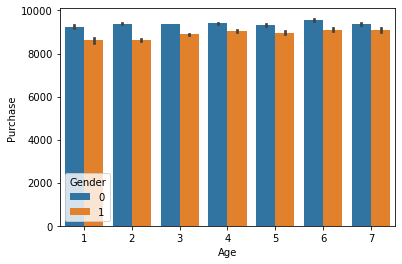

In [66]:
# Visualising Age and Purchase
sns.barplot("Age","Purchase",hue = "Gender",data = data_copy)

#### From this we can say that both of men and women have done high number of shopping.But we can say Men has done more purchasing than women

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

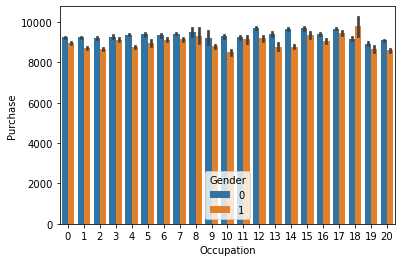

In [70]:
# Visualising Occupation and Purchase
sns.barplot("Occupation","Purchase",hue="Gender",data=data_copy)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cat1', ylabel='Purchase'>

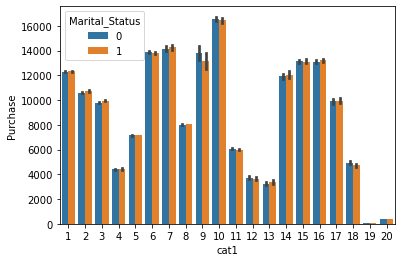

In [71]:
# Visualising cat1 and Purchase
sns.barplot("cat1","Purchase",hue = "Marital_Status",data = data_copy)

### From here we can conclude that , not all the cat1 products seems to be attractive the people as we see very variations in buying of them 

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cat2', ylabel='Purchase'>

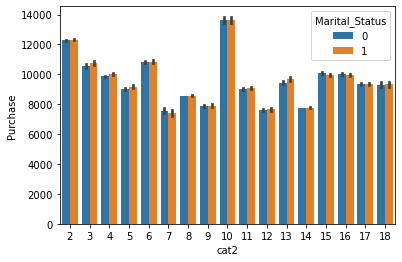

In [74]:
# Visualising cat2 and Purchase
sns.barplot("cat2","Purchase",hue = "Marital_Status",data = data_copy)

### From this graph we can conclude that, the cat2 products are moderately attractive to the people

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cat3', ylabel='Purchase'>

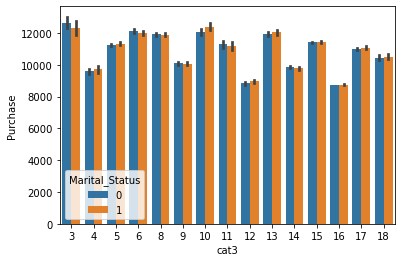

In [75]:
# Visualising cat3 and Purchase
sns.barplot("cat3","Purchase",hue = "Marital_Status",data = data_copy)

### From this graph we can conclude that, the cat3 products are moderately attractive to the people

In [85]:
# Now splitting data for model into features and labels 
X = data_copy.drop("Purchase",axis=1) #creating the feature data (independent features)
y = data_copy["Purchase"]  #creating the label data(dependent feature)

In [80]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [84]:
print(X_train.shape)       #feature data
print(X_test.shape)       #feature data
print(y_train.shape)       #label data
print(y_test.shape)       #label data

(587750, 8)
(195917, 8)
(587750,)
(195917,)


In [87]:
# now we will do the feature scalling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [90]:
X_train

array([[-0.57280933, -0.36644722,  0.44736912, ..., -0.09435038,
         1.10026507,  0.36845118],
       [-0.57280933, -0.36644722,  1.52048837, ..., -0.09435038,
        -0.29513717,  0.36845118],
       [ 1.74578163, -1.10520647, -0.62575013, ...,  0.67990423,
         0.40256395,  0.36845118],
       ...,
       [ 1.74578163,  1.1110713 , -0.31914463, ..., -0.09435038,
         1.10026507,  0.36845118],
       [ 1.74578163, -0.36644722, -0.77905288, ...,  0.67990423,
        -0.29513717,  0.36845118],
       [-0.57280933,  1.84983056, -0.16584188, ...,  2.48649834,
         1.56539915,  0.36845118]])

In [89]:
X_test

array([[-0.57304968, -0.36969453,  1.36941946, ..., -1.12331682,
        -0.75590214, -2.54511918],
       [ 1.74504939, -0.36969453, -0.62454297, ...,  0.67685032,
        -0.29145209,  0.37034022],
       [-0.57304968, -0.36969453,  0.60251084, ..., -0.60898335,
        -1.22035219, -1.08738948],
       ...,
       [-0.57304968,  0.37100642, -0.47116124, ...,  0.67685032,
        -0.29145209,  0.37034022],
       [ 1.74504939,  1.85240832, -0.16439779, ..., -1.12331682,
         1.10189807,  0.73477264],
       [ 1.74504939, -1.11039548, -1.23806987, ..., -0.60898335,
        -1.22035219,  0.37034022]])